<a href="https://colab.research.google.com/github/Ankita-chouhan-github/Sentiment-Analysis-of-COVID-19-tweets/blob/main/COVID_19_Tweet_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Problem Description : Sentiment Analysis - Predicting Sentiment of COVID-19 Tweets**
This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.
The names and usernames have been given codes to avoid any privacy concerns.
You are given the following information:
* Location
* Tweet At
* Original Tweet
* Label

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud
import nltk
nltk.download('all',quiet=True)
from PIL import Image

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Capstone Project/Coronavirus Tweets.csv', encoding = 'latin-1')

In [5]:
df1 = df.copy()

We have made a copy so that the original dataframe remains same while we perform transformation on the copied dataframe.

In [6]:
df1.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


There are no Null values present in our dataset

In [8]:
df1.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

There are 6 columns out of which our target/dependent variable is sentiment

In [23]:
# for sentiment analysis the two main columns that we require are 'OriginalTweet', 'Sentiment', 'Location' & 'TweetAt'
df_model = df1[['OriginalTweet','Sentiment', 'Location', 'TweetAt']]

In [24]:
df_model.head()

,OriginalTweet,Sentiment,Location,TweetAt
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,London,16-03-2020
1,advice Talk to your neighbours family to excha...,Positive,UK,16-03-2020
2,Coronavirus Australia: Woolworths to give elde...,Positive,Vagabonds,16-03-2020
3,My food stock is not the only one which is emp...,Positive,NaN,16-03-2020
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative,NaN,16-03-2020


In [25]:
# Statistical Analysis of datset
df_model.describe()

,OriginalTweet,Sentiment,Location,TweetAt
count,41157,41157,32567,41157
unique,41157,5,12220,30
top,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Positive,London,20-03-2020
freq,1,11422,540,3448


In [26]:
# Checking unique values in our dataset
df_model.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

In [27]:
#check duplicate entries
len(df_model[df_model.duplicated()])

0

There are no duplicate entries in our dataset

In [28]:
# Checking null value
df_model.isnull().sum()

OriginalTweet       0
Sentiment           0
Location         8590
TweetAt             0
dtype: int64

In [29]:
# Checking  missing values in 'Location' column
miss_value = df_model['Location'].isnull().sum()/(df_model.shape[0]) * 100
print("We have {:.2f} % of missing values in 'Location' Column".format(miss_value))


We have 20.87 % of missing values in 'Location' Column


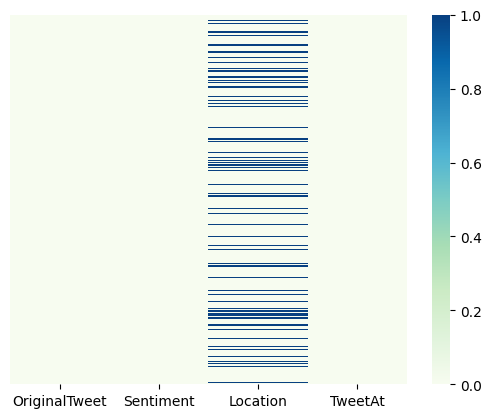

In [30]:
# Plot for missing values across different columns
missing_graph = sns.heatmap(df_model.isnull(), cbar=True, yticklabels=False, cmap="GnBu")
plt.show()

#**EDA- Exploratory Data Analysis**

**Short Overview:** The original dataset has 6 columns and 41157 rows. In order to analyse various sentiments, We require just only two columns named Original Tweet and Sentiment. There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis. All tweets data collected from the months of March and April 2020. There are various #hashtags in tweets column which we will like to explore.People also have different sentiments about various issues shows us their optimism during pandemic times.

#**1. Location**

In [34]:
# Looking the count value of different Location
df_model.Location.value_counts().head(20)

London                     540
United States              528
London, England            520
New York, NY               395
Washington, DC             373
United Kingdom             337
Los Angeles, CA            281
India                      268
UK                         232
Australia                  225
USA                        223
Canada                     191
England, United Kingdom    191
Toronto, Ontario           160
Global                     159
Chicago, IL                155
California, USA            153
San Francisco, CA          152
Boston, MA                 150
New York, USA              140
Name: Location, dtype: int64

In [35]:
# Looking for the unique values in the variable
df_model.Location.unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)